In [1]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import csv #Do I need this one?
import pandas as pd
import re
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#df = pd.read_csv('../data cleaning/tweets_el.csv',names=["tweet_id","word"]) 
tweets = pd.read_csv('../data cleaning/text of tweets.csv',names=["tweet_id","tweet"]) 
#the .. moves up the directory then down to the right file. 
#tweets = df.groupby('tweet_id')['word'].apply(lambda x: ' '.join(x.astype(str))).reset_index()
#tweets.columns = ['tweet', 'text']
tweets

,tweet_id,tweet
0,NaN,text
1,0.0,Anyone feel like looking through the list of i...
2,1.0,"""If you think that your right to speech is mor..."
3,2.0,I ran at elevation to make it to user308 s #Di...
4,3.0,user172 user308 user36 Here!!! #disruptJMM you...
...,...,...
1125,1124.0,RT user266 AMS-AWM invited session on Mathema...
1126,1125.0,RT user266 AMS-AWM invited session on Mathema...
1127,1126.0,RT user246 “[C]arry some of this weight with ...
1128,1127.0,RT user75 Kelly MacArthur now speaking about ...


In [3]:
groupNum=7
documents=tweets["tweet"]


#documents=["I write something does this have to be really long", "I am so very lost bro, what's going on something else"]

#vectorizer=TfidfVectorizer(stop_words='english')
stopwords_list=stopwords.words("english")
#stopwords_list+= ["rt", "https://t.co/pIPCd6Nu9s","https://t.co/DdGBGsLBKe","pipcd6nu9s", "ddgbgslbke", "https"]
stopwords_list+= ["rt", "RT"]

def cleaner(s):
    out=re.sub(r'http.*\s?', '',s)
    out=re.sub(r'\s\d+','',out)
    out=re.sub(r':\d+','',out)
    out= out.lower()
    return out

#vectorizer=TfidfVectorizer(stop_words=stopwords_list, preprocessor=lambda s: re.sub(r'http.*\s?', '',s).lower())
vectorizer=TfidfVectorizer(stop_words=stopwords_list,preprocessor=cleaner)

X=vectorizer.fit_transform(documents)
names=vectorizer.get_feature_names_out()
print(names[0:20])
n=len(names)
#print(X)

nmf=NMF(n_components=groupNum, max_iter=10000,l1_ratio=0)
W=nmf.fit_transform(X)
H=nmf.components_

print("Document-Topic Matrix:\n", W)
print("Topic-Word Matrix:\n", H)

for i in range(groupNum):
    print("*********************************************")
    print("Names in Group:", i+1)
    for j in range(n):
        if H[i,j]>.1:
            print(names[j])


['270' 'aaron' 'aba' 'absolutely' 'absolutism' 'ac' 'acade' 'academia'
 'academic' 'academy' 'accepted' 'accepting' 'accessible' 'accompaniment'
 'accountable' 'accurately' 'acknowledge' 'acknowledged' 'acknowledging'
 'acknowledgment']
Document-Topic Matrix:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.11727454e-94]
 [0.00000000e+00 3.71212783e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.76569751e-02 ... 0.00000000e+00
  0.00000000e+00 7.25720689e-03]
 ...
 [7.30197019e-03 0.00000000e+00 1.62309149e-03 ... 0.00000000e+00
  4.51645387e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.99950992e-03 0.00000000e+00]
 [4.99585032e-03 0.00000000e+00 1.00675882e-03 ... 0.00000000e+00
  3.06211413e-03 0.00000000e+00]]
Topic-Word Matrix:
 [[1.42974960e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82168646e-05]
 [0.00000000e+00 3.8

[0.4871253 0.4871253 0.4871253 0.4871253 0.4871253]


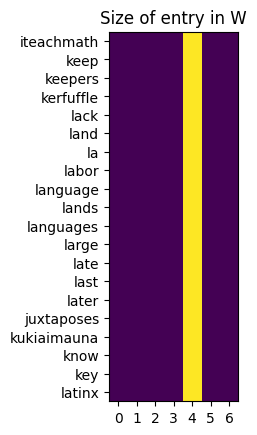

In [4]:
from matplotlib import pyplot as plt
#Now adding a heatmap
row_number = 20

sorted_indices_smalltolarge = np.argsort(W.max(axis=1))
sorted_indices_lts = sorted_indices_smalltolarge[::-1]
#sorted_matrix_stl = W[sorted_indices_smalltolarge]
#sorted_matrix=sorted_matrix_stl[::-1]
sorted_matrix=W[sorted_indices_lts]
print(sorted_matrix[0:5,:].max(axis=1))

fig, ax = plt.subplots()
im = ax.imshow(sorted_matrix[0:row_number,:])

ax.set_yticks(ticks = range(row_number), labels = names[sorted_indices_lts[0:row_number]])
ax.set_xticks(ticks = range(groupNum))

ax.set_title("Size of entry in W")
plt.show()

In [5]:
import torch
from NeuralNMF import Neural_NMF
X = 10*torch.mm(torch.randn(100,5),torch.randn(5,20)) #produce random low rank data
m, k1, k2, = X.shape[0], 10, 5
net = Neural_NMF([m, k1, k2])

In [6]:
from NeuralNMF import train
history = train(net, X, epoch=6, lr=500, supervised=False)
epoch =  1 
tensor(485.2435, dtype=torch.float64)
epoch =  2 
tensor(475.1584, dtype=torch.float64)
epoch =  3 
tensor(461.2400, dtype=torch.float64)
epoch =  4 
tensor(444.1705, dtype=torch.float64)
epoch =  5 
tensor(430.4947, dtype=torch.float64)
epoch =  6 
tensor(422.7317, dtype=torch.float64)

100%|██████████| 6/6 [00:00<00:00, 13.42it/s]


NameError: name 'tensor' is not defined

Tutorial time!!!! from Medium article

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "Mango, pineapple and banana smoothie.",
  "Strawberry, blueberry and raspberry smoothie.",
    "Mango, pineapple and coconut smoothie."
]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

print(X.toarray())
print(X.shape)
print(vectorizer.get_feature_names_out())
nmf = NMF(n_components=2, random_state=42)
print(nmf)
W = nmf.fit_transform(X)
H = nmf.components_

print("Document-Topic Matrix:\n", W)
print("Topic-Word Matrix:\n", H)

[[0.63174505 0.         0.         0.4804584  0.4804584  0.
  0.37311881 0.        ]
 [0.         0.54645401 0.         0.         0.         0.54645401
  0.32274454 0.54645401]
 [0.         0.         0.63174505 0.4804584  0.4804584  0.
  0.37311881 0.        ]]
(3, 8)
['banana' 'blueberry' 'coconut' 'mango' 'pineapple' 'raspberry' 'smoothie'
 'strawberry']
NMF(n_components=2, random_state=42)
Document-Topic Matrix:
 [[6.27920439e-01 2.89477799e-17]
 [1.81158550e-17 8.23117356e-01]
 [6.27920439e-01 1.14221590e-17]]
Topic-Word Matrix:
 [[0.50304546 0.         0.50304546 0.76515808 0.76515808 0.
  0.59421351 0.        ]
 [0.         0.66388348 0.         0.         0.         0.66388348
  0.39210028 0.66388348]]


In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "Mango, pineapple and banana.",
  "Strawberry, blueberry and raspberry.",
    "Mango, pineapple and coconut."
]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

print(X)
print(X.toarray())
print(X.shape)
print(vectorizer.get_feature_names_out())
nmf = NMF(n_components=2, random_state=42) ##Pick the rank, n_components is 
#2 in this case
print(nmf)
W = nmf.fit_transform(X)
H = nmf.components_

print("Document-Topic Matrix:\n", W)
print("Topic-Word Matrix:\n", H)

  (0, 3)	0.5178561161676974
  (0, 4)	0.5178561161676974
  (0, 0)	0.680918560398684
  (1, 6)	0.5773502691896257
  (1, 1)	0.5773502691896257
  (1, 5)	0.5773502691896257
  (2, 3)	0.5178561161676974
  (2, 4)	0.5178561161676974
  (2, 2)	0.680918560398684
[[0.68091856 0.         0.         0.51785612 0.51785612 0.
  0.        ]
 [0.         0.57735027 0.         0.         0.         0.57735027
  0.57735027]
 [0.         0.         0.68091856 0.51785612 0.51785612 0.
  0.        ]]
(3, 7)
['banana' 'blueberry' 'coconut' 'mango' 'pineapple' 'raspberry'
 'strawberry']
NMF(n_components=2, random_state=42)
Document-Topic Matrix:
 [[0.52010624 0.        ]
 [0.         0.80515326]
 [0.52010624 0.        ]]
Topic-Word Matrix:
 [[0.65459564 0.         0.65459564 0.99567372 0.99567372 0.
  0.        ]
 [0.         0.71706878 0.         0.         0.         0.71706878
  0.71706878]]


In [ ]:
import numpy as np
X2=np.array([[1,1,1,0,0,0,0],[0,0,0,1,1,1,0],[1,1,0,0,0,0,1]])

In [ ]:
nmf = NMF(n_components=2, random_state=42)
print(nmf)
W2 = nmf.fit_transform(X2)
H2 = nmf.components_

print("Document-Topic Matrix:\n", W2)
print("Topic-Word Matrix:\n", H2)

NMF(n_components=2, random_state=42)
Document-Topic Matrix:
 [[5.29056791e-01 2.71050543e-20]
 [0.00000000e+00 9.33743230e-01]
 [5.29056791e-01 2.71050543e-20]]
Topic-Word Matrix:
 [[1.89015625 1.89015625 0.94507813 0.         0.         0.
  0.94507813]
 [0.         0.         0.         1.07095823 1.07095823 1.07095823
  0.        ]]


In [ ]:
Rachel=np.array([[np.log(3/2)+1,np.log(3/2)+1,np.log(3)+1,0,0,0,0],[
    0,0,0,np.log(3)+1,np.log(3)+1,np.log(3)+1,0],
              [np.log(3/2)+1,np.log(3/2)+1,0,0,0,0,np.log(3)+1]])

Rachel

array([[1.40546511, 1.40546511, 2.09861229, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.09861229, 2.09861229,
        2.09861229, 0.        ],
       [1.40546511, 1.40546511, 0.        , 0.        , 0.        ,
        0.        , 2.09861229]])

In [ ]:
from sklearn.preprocessing import normalize
normalize(Rachel, norm="l2")

array([[0.48624042, 0.48624042, 0.72604443, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57735027, 0.57735027,
        0.57735027, 0.        ],
       [0.48624042, 0.48624042, 0.        , 0.        , 0.        ,
        0.        , 0.72604443]])

In [ ]:
norm_berry=np.linalg.norm(Rachel,2,0)
normed=[]
for i in range(7):
    Rachel[:,i]/norm_berry[i]
print(Rachel2)

[0. 0. 1.]


array([1.40546511, 0.        , 1.40546511])

[0 2 1 3]
[3 1 2 0]
[[6 5 4]
 [1 5 2]
 [2 2 2]
 [0 1 2]]
[6 5 2 2]


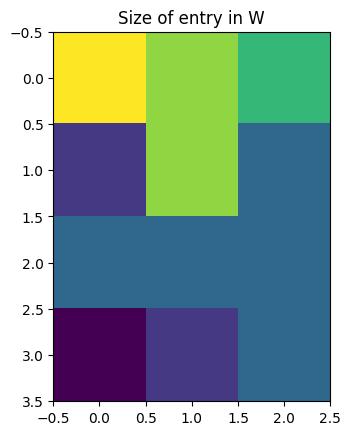

In [ ]:
Wtest = np.array([[0,1,2],[1,5,2],[2,2,2],[6,5,4]])

sorted_indices_smalltolargetest = np.argsort(Wtest.max(axis=1))
print(sorted_indices_smalltolargetest)
sorted_indicestest = Wtest.shape[0]-sorted_indices_smalltolargetest-1
print(sorted_indicestest)
sorted_matrixtest = Wtest[sorted_indicestest]
print(sorted_matrixtest)
print(sorted_matrixtest.max(axis=1))
fig, ax = plt.subplots()
im = ax.imshow(sorted_matrixtest[:,:])

#ax.set_yticks(names[0:50])

ax.set_title("Size of entry in W")
plt.show()